# Decision Trees
You should build a machine learning pipeline using a decision tree model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Train and test a decision tree model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

### Import libraries

In [104]:
import pandas as pd
import sklearn.model_selection
import sklearn.tree
import sklearn.metrics


### Import dataset

In [105]:
mnist_db = pd.read_csv('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/teaching-main/datasets/mnist.csv')
mnist_db = mnist_db.set_index('id')
mnist_db.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
id,,,,,,,,,,,,,,,,,,,,,
31953,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34452,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60897,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split into training and testing datasets

In [106]:
x = mnist_db.drop('class', axis=1)
y = mnist_db['class']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)

print('mnist_db', mnist_db.shape)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

mnist_db (4000, 785)
x_train (3000, 784)
x_test (1000, 784)
y_train (3000,)
y_test (1000,)


### Training the model

In [107]:
model = sklearn.tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Testing the model

In [108]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print(accuracy)

0.635


### Visualize the decision tree

[Text(167.4, 195.696, 'X[568] <= 0.5\nentropy = 3.315\nsamples = 3000\nvalue = [274, 370, 304, 308, 274, 267, 290, 314, 320, 279]\nclass = y[1]'),
 Text(83.7, 152.208, 'X[430] <= 3.5\nentropy = 3.085\nsamples = 1800\nvalue = [30, 312, 53, 168, 261, 106, 153, 304, 139, 274]\nclass = y[1]'),
 Text(41.85, 108.72, 'X[405] <= 1.5\nentropy = 2.561\nsamples = 923\nvalue = [11, 307, 32, 89, 18, 29, 15, 272, 96, 54]\nclass = y[1]'),
 Text(20.925, 65.232, 'X[154] <= 0.5\nentropy = 1.817\nsamples = 371\nvalue = [11, 8, 18, 27, 11, 10, 5, 254, 3, 24]\nclass = y[7]'),
 Text(10.4625, 21.744, 'entropy = 1.07\nsamples = 304\nvalue = [5, 1, 4, 6, 6, 4, 2, 254, 1, 21]\nclass = y[7]'),
 Text(31.387500000000003, 21.744, 'entropy = 2.792\nsamples = 67\nvalue = [6, 7, 14, 21, 5, 6, 3, 0, 2, 3]\nclass = y[3]'),
 Text(62.775000000000006, 65.232, 'X[346] <= 1.0\nentropy = 2.142\nsamples = 552\nvalue = [0, 299, 14, 62, 7, 19, 10, 18, 93, 30]\nclass = y[1]'),
 Text(52.3125, 21.744, 'entropy = 1.492\nsamples = 41

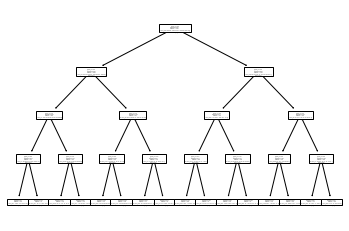

In [109]:
#sklearn.tree.plot_tree(model, max_depth=2)
sklearn.tree.plot_tree(model, class_names=True)